# get the dataset

In [1]:
import torch
import torchvision
from torch import nn


import torchvision.datasets as datasets
import torchvision.transforms as transforms

import pathlib
data_dir = pathlib.Path("../data")

In [2]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 4996278331/4996278331 [04:10<00:00, 19935658.30it/s]


Extracting ../data/food-101.tar.gz to ../data


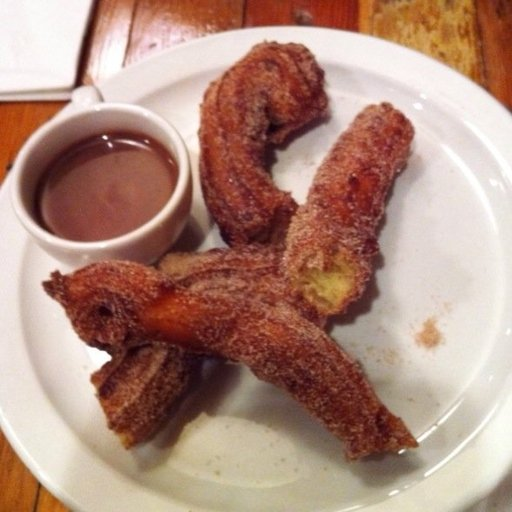

In [3]:
train_data[0][0]

In [4]:
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = ["bibimbap", "cheesecake", "donuts"]

amount_to_get = 1

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["bibimbap", "cheesecake", "donuts"],
               amount=1,
               seed=42):
    random.seed(42)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 2250 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 750 images for test...


[PosixPath('../data/food-101/images/bibimbap/3101952.jpg'),
 PosixPath('../data/food-101/images/bibimbap/1453463.jpg'),
 PosixPath('../data/food-101/images/cheesecake/2856239.jpg'),
 PosixPath('../data/food-101/images/cheesecake/2262620.jpg'),
 PosixPath('../data/food-101/images/cheesecake/1845902.jpg'),
 PosixPath('../data/food-101/images/bibimbap/3640400.jpg'),
 PosixPath('../data/food-101/images/bibimbap/2915290.jpg'),
 PosixPath('../data/food-101/images/donuts/921183.jpg'),
 PosixPath('../data/food-101/images/bibimbap/2643176.jpg'),
 PosixPath('../data/food-101/images/donuts/2055446.jpg')]

In [5]:
# Create target directory path
target_dir_name = "data/bibimbap_cheesecake_donuts"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: 'data/bibimbap_cheesecake_donuts'


In [6]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data/food-101/images/bibimbap/3101952.jpg to data/bibimbap_cheesecake_donuts/train/bibimbap/3101952.jpg...
[INFO] Copying ../data/food-101/images/bibimbap/1453463.jpg to data/bibimbap_cheesecake_donuts/train/bibimbap/1453463.jpg...
[INFO] Copying ../data/food-101/images/cheesecake/2856239.jpg to data/bibimbap_cheesecake_donuts/train/cheesecake/2856239.jpg...
[INFO] Copying ../data/food-101/images/cheesecake/2262620.jpg to data/bibimbap_cheesecake_donuts/train/cheesecake/2262620.jpg...
[INFO] Copying ../data/food-101/images/cheesecake/1845902.jpg to data/bibimbap_cheesecake_donuts/train/cheesecake/1845902.jpg...
[INFO] Copying ../data/food-101/images/bibimbap/3640400.jpg to data/bibimbap_cheesecake_donuts/train/bibimbap/3640400.jpg...
[INFO] Copying ../data/food-101/images/bibimbap/2915290.jpg to data/bibimbap_cheesecake_donuts/train/bibimbap/2915290.jpg...
[INFO] Copying ../data/food-101/images/donuts/921183.jpg to data/bibimbap_cheesecake_donuts/train/donuts/921183.j

# Load data

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [9]:
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "bibimbap_cheesecake_donuts"

Random image path: data/bibimbap_cheesecake_donuts/train/donuts/518923.jpg
Image class: donuts
Image height: 512
Image width: 512


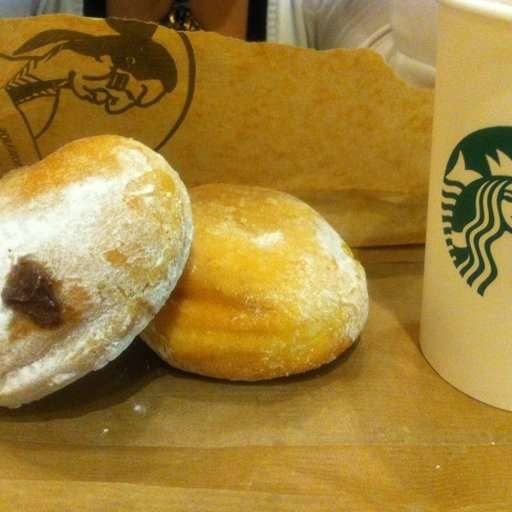

In [10]:
import random
from PIL import Image

# Set seed
# random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [11]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7BA16E509F30>


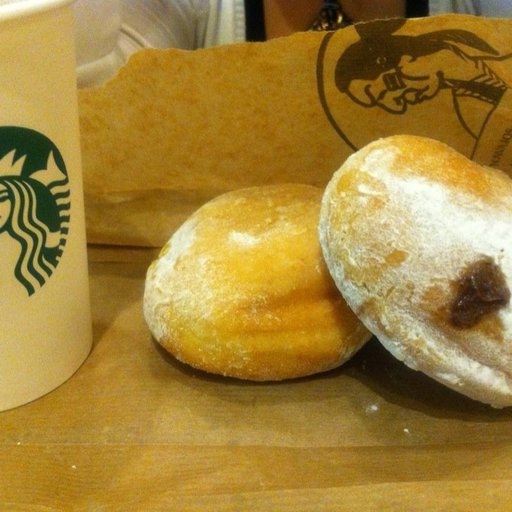

In [12]:
img.transpose(0)

In [13]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

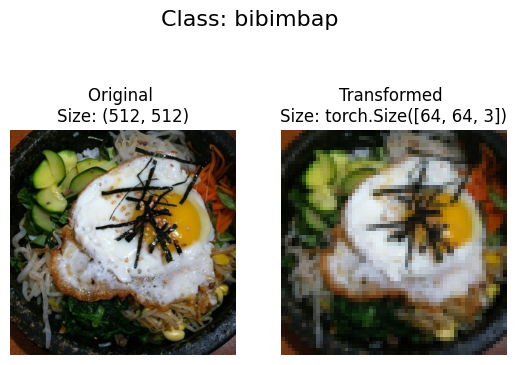

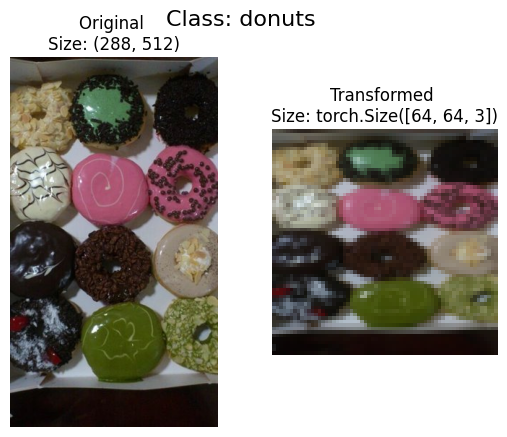

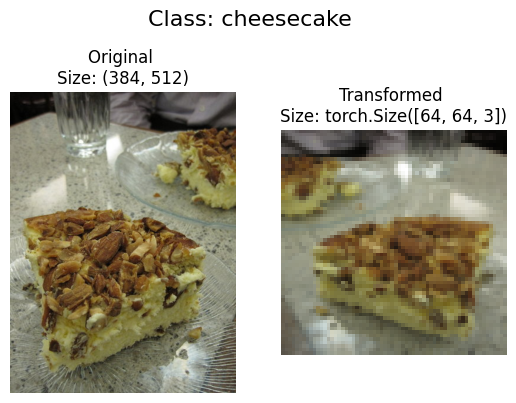

In [14]:
import numpy as np
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            # print("f", np.asarray(f))
            # img_as_array = np.asarray(f)

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [15]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [16]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 2250
    Root location: data/bibimbap_cheesecake_donuts/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 750
    Root location: data/bibimbap_cheesecake_donuts/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [17]:
class_names = train_data.classes
class_names

['bibimbap', 'cheesecake', 'donuts']

In [18]:
len(train_data), len(test_data)

(2250, 750)

In [19]:
train_data.samples[42][1]

0

In [20]:
# from torch.utils.data import DataLoader
# train_dataloader = DataLoader(dataset=train_data,
#                               batch_size=1, # how many samples per batch?
#                               num_workers=1, # how many subprocesses to use for data loading? (higher = more)
#                               shuffle=True) # shuffle the data?

# test_dataloader = DataLoader(dataset=test_data,
#                              batch_size=1,
#                              num_workers=1,
#                              shuffle=False) # don't usually need to shuffle testing data

# Model



## transforms

In [21]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor(),
])

In [22]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


Creating DataLoader's with batch size 32 and 8 workers.


## TinyVGG

In [23]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            # nn.Linear(in_features=hidden_units*16*16,
            #           out_features=hidden_units*16*16),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        # x = self.conv_block_1(x)
        # # print(x.shape)
        # x = self.conv_block_2(x)
        # # print(x.shape)
        # x = self.classifier(x)
        # print(x.shape)
        # return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [24]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [25]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [26]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        if epoch % 2 == 0 or epoch == 1:
            print(
                f"Epoch: {epoch+1} | "
                f"train_loss: {train_loss:.4f} | "
                f"train_acc: {train_acc:.4f} | "
                f"test_loss: {test_loss:.4f} | "
                f"test_acc: {test_acc:.4f}"
            )
        # print(
        #     f"Epoch: {epoch+1} | "
        #     f"train_loss: {train_loss:.4f} | "
        #     f"train_acc: {train_acc:.4f} | "
        #     f"test_loss: {test_loss:.4f} | "
        #     f"test_acc: {test_acc:.4f}"
        # )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

## Train and result of TinyVgg

In [27]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 100

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=15,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0775 | train_acc: 0.3908 | test_loss: 1.0075 | test_acc: 0.4996
Epoch: 2 | train_loss: 1.0012 | train_acc: 0.5048 | test_loss: 0.9994 | test_acc: 0.5273
Epoch: 3 | train_loss: 0.9717 | train_acc: 0.5161 | test_loss: 0.9575 | test_acc: 0.5450
Epoch: 5 | train_loss: 0.9347 | train_acc: 0.5503 | test_loss: 0.9199 | test_acc: 0.5660
Epoch: 7 | train_loss: 0.8753 | train_acc: 0.5974 | test_loss: 0.8477 | test_acc: 0.6105
Epoch: 9 | train_loss: 0.8231 | train_acc: 0.6341 | test_loss: 0.8769 | test_acc: 0.6064
Epoch: 11 | train_loss: 0.7808 | train_acc: 0.6505 | test_loss: 0.8303 | test_acc: 0.6257
Epoch: 13 | train_loss: 0.7413 | train_acc: 0.6680 | test_loss: 0.7830 | test_acc: 0.6665
Epoch: 15 | train_loss: 0.7538 | train_acc: 0.6615 | test_loss: 0.7696 | test_acc: 0.6535
Epoch: 17 | train_loss: 0.7258 | train_acc: 0.6915 | test_loss: 0.7712 | test_acc: 0.6912
Epoch: 19 | train_loss: 0.6787 | train_acc: 0.7072 | test_loss: 0.7898 | test_acc: 0.6423
Epoch: 21 | trai

Epoch: 95 | train_loss: 0.3897 | train_acc: 0.8489 | test_loss: 0.6524 | test_acc: 0.7372

Epoch: 97 | train_loss: 0.4122 | train_acc: 0.8406 | test_loss: 0.6683 | test_acc: 0.7349

Epoch: 99 | train_loss: 0.3952 | train_acc: 0.8512 | test_loss: 0.6970 | test_acc: 0.7310


save the tinyvgg model

In [28]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "TinyVgg_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(),
           MODEL_SAVE_PATH)

In [29]:
from typing import Dict,List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

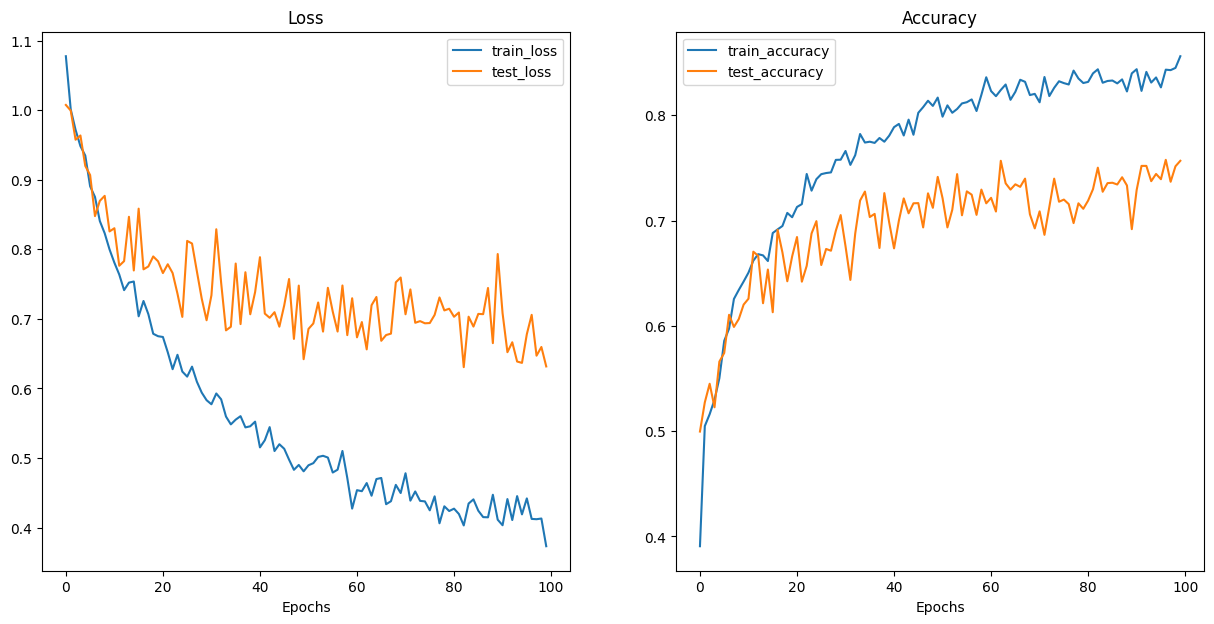

In [30]:
plot_loss_curves(model_0_results)

## Resnet18

In [31]:
from torchvision import models
res_model = models.resnet18(pretrained=True)
# for param in res_model.parameters():
#     param.requires_grad = False


num_ftrs = res_model.fc.in_features
res_model.fc = nn.Linear(num_ftrs, 3)

res_model = res_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 146MB/s]


## Train and result of resnet18

In [32]:
optimizer = torch.optim.Adam(params=res_model.parameters(), lr=0.001)

res_model_results = train(model=res_model,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8826 | train_acc: 0.6719 | test_loss: 0.5278 | test_acc: 0.7857
Epoch: 2 | train_loss: 0.5274 | train_acc: 0.7904 | test_loss: 0.4456 | test_acc: 0.8292
Epoch: 3 | train_loss: 0.4408 | train_acc: 0.8216 | test_loss: 0.4928 | test_acc: 0.8170
Epoch: 5 | train_loss: 0.3779 | train_acc: 0.8514 | test_loss: 0.4053 | test_acc: 0.8283
Epoch: 7 | train_loss: 0.3280 | train_acc: 0.8762 | test_loss: 0.5988 | test_acc: 0.7571
Epoch: 9 | train_loss: 0.3191 | train_acc: 0.8842 | test_loss: 0.4147 | test_acc: 0.8573
Epoch: 11 | train_loss: 0.2727 | train_acc: 0.8937 | test_loss: 0.3624 | test_acc: 0.8616
Epoch: 13 | train_loss: 0.2509 | train_acc: 0.9070 | test_loss: 0.4572 | test_acc: 0.8309
Epoch: 15 | train_loss: 0.2860 | train_acc: 0.8859 | test_loss: 0.6855 | test_acc: 0.7692
Epoch: 17 | train_loss: 0.2130 | train_acc: 0.9181 | test_loss: 0.4287 | test_acc: 0.8534
Epoch: 19 | train_loss: 0.1996 | train_acc: 0.9290 | test_loss: 0.3891 | test_acc: 0.8521
Epoch: 21 | trai

pretrained=True && fixed weight:

Epoch: 17 | train_loss: 0.4678 | train_acc: 0.8121 | test_loss: 0.4466 | test_acc: 0.8378

Epoch: 19 | train_loss: 0.4525 | train_acc: 0.8099 | test_loss: 0.4559 | test_acc: 0.8317

Epoch: 21 | train_loss: 0.4157 | train_acc: 0.8305 | test_loss: 0.4481 | test_acc: 0.8391

pretrained=True && unfixed weight: (overfitting)

Epoch: 15 | train_loss: 0.0595 | train_acc: 0.9820 | test_loss: 0.3821 | test_acc: 0.8785

Epoch: 17 | train_loss: 0.0747 | train_acc: 0.9754 | test_loss: 0.3748 | test_acc: 0.8802

Epoch: 19 | train_loss: 0.0431 | train_acc: 0.9890 | test_loss: 0.7984 | test_acc: 0.8330

Epoch: 21 | train_loss: 0.0523 | train_acc: 0.9797 | test_loss: 0.5279 | test_acc: 0.8711



pretrained=True && unfixed weight && data augmentation （少了）:

Epoch: 17 | train_loss: 0.2297 | train_acc: 0.9163 | test_loss: 0.3724 | test_acc: 0.8542

Epoch: 19 | train_loss: 0.2616 | train_acc: 0.9053 | test_loss: 0.3497 | test_acc: 0.8795

Epoch: 21 | train_loss: 0.2373 | train_acc: 0.9087 | test_loss: 0.5611 | test_acc: 0.7887

save resnet18 model

In [33]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "Resnet18_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(res_model.state_dict(),
           MODEL_SAVE_PATH)

In [34]:
# Install torchinfo if it's not available, import it if it is

# try:
#     import torchinfo
# except:
#     !pip install torchinfo
#     import torchinfo

# from torchinfo import summary
# summary(res_model, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size


In [35]:
res_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

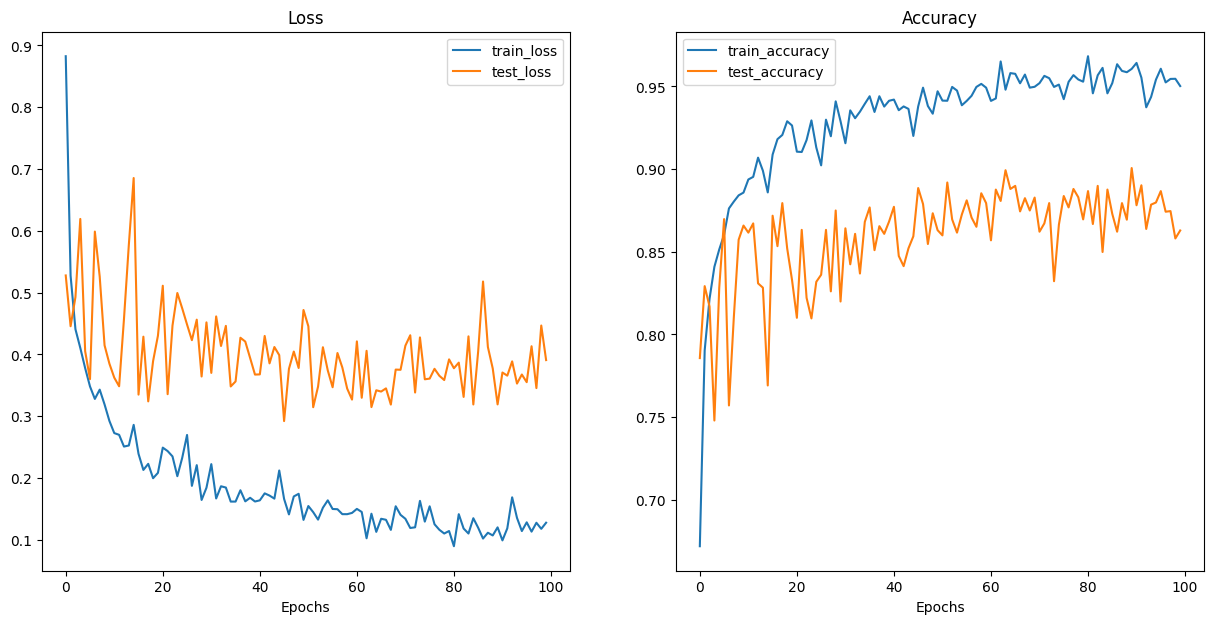

In [36]:
Replace the Last Layer: By executing model.fc = nn.Linear(num_ftrs, class_num), you are replacing the last fully connected layer of the ResNet model. num_ftrs is the number of input features to this layer (which matches the number of output features from the previous layer of the original ResNet model), and class_num is the number of output features you want (which corresponds to the number of classes in your specific task). This new layer starts with random weights and does not retain any of the pre-trained weights.plot_loss_curves(res_model_results)

Load Pre-trained Model: When you load ResNet-18 with pretrained=True, all the layers of the model are initialized with weights that were learned while training on the ImageNet dataset. This includes all convolutional layers, batch normalization layers, and the original fully connected layer at the end of the network.

Replace the Last Layer: By executing model.fc = nn.Linear(num_ftrs, class_num), you are replacing the last fully connected layer of the ResNet model. num_ftrs is the number of input features to this layer (which matches the number of output features from the previous layer of the original ResNet model), and class_num is the number of output features you want (which corresponds to the number of classes in your specific task). This new layer starts with random weights and does not retain any of the pre-trained weights.

Training Process: In your training process, you will typically need to train only this new layer, while the rest of the network can be left with its pre-trained weights. This is known as "fine-tuning." However, depending on your specific task and dataset, you might choose to fine-tune more layers of the network. The choice between training only the last layer vs. more layers depends on how similar your task is to the task the network was originally trained on (ImageNet classification), and the size of your dataset.

Freezing Layers: If you decide to train only the last layer, you should "freeze" the weights of the earlier layers, so they don't get updated during training. This is done by setting requires_grad to False for all parameters of these layers. This way, only the parameters of the last layer will be updated during training.


for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(num_ftrs, class_num)


## VGG16

In [37]:
vgg_model = models.vgg16(pretrained=True)

# Freeze the feature parameters
for param in vgg_model.features.parameters():
    param.requires_grad = False

# Replace the classifier
num_ftrs = vgg_model.classifier[6].in_features
vgg_model.classifier[6] = nn.Linear(num_ftrs, 3)

# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg_model = vgg_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 189MB/s]


In [38]:
optimizer = torch.optim.Adam(params=vgg_model.parameters(), lr=0.001)

vgg16_results = train(model=vgg_model,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1321 | train_acc: 0.6570 | test_loss: 0.4773 | test_acc: 0.8166
Epoch: 2 | train_loss: 0.7506 | train_acc: 0.7326 | test_loss: 0.4387 | test_acc: 0.8183
Epoch: 3 | train_loss: 0.8589 | train_acc: 0.7329 | test_loss: 0.6059 | test_acc: 0.8335
Epoch: 5 | train_loss: 0.8866 | train_acc: 0.7314 | test_loss: 0.7399 | test_acc: 0.7174
Epoch: 7 | train_loss: 0.7287 | train_acc: 0.7654 | test_loss: 0.5116 | test_acc: 0.8112
Epoch: 9 | train_loss: 0.7765 | train_acc: 0.7397 | test_loss: 0.4921 | test_acc: 0.8008
Epoch: 11 | train_loss: 0.7281 | train_acc: 0.7615 | test_loss: 0.4675 | test_acc: 0.8395
Epoch: 13 | train_loss: 0.7363 | train_acc: 0.7739 | test_loss: 0.4337 | test_acc: 0.8082
Epoch: 15 | train_loss: 0.6267 | train_acc: 0.7693 | test_loss: 0.4378 | test_acc: 0.8465
Epoch: 17 | train_loss: 0.5647 | train_acc: 0.8007 | test_loss: 0.4538 | test_acc: 0.8300
Epoch: 19 | train_loss: 0.5720 | train_acc: 0.7911 | test_loss: 0.4336 | test_acc: 0.8534
Epoch: 21 | trai

In [39]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "VGG16_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(res_model.state_dict(),
           MODEL_SAVE_PATH)

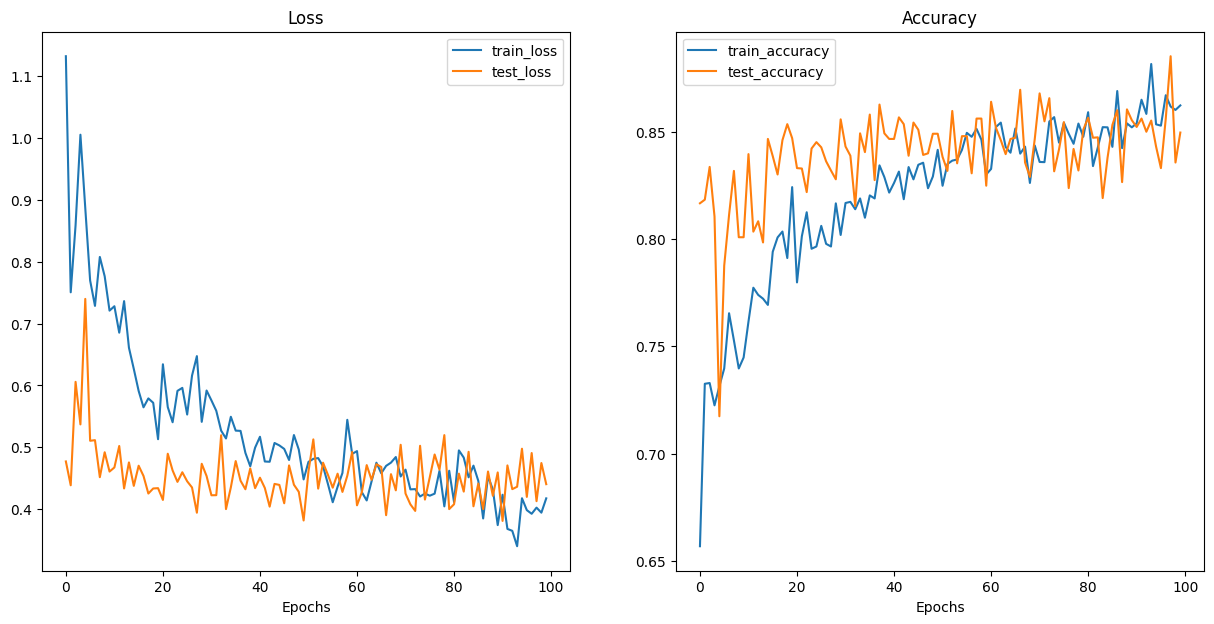

In [40]:
plot_loss_curves(vgg16_results)

# test

In [42]:
import requests

# Setup custom image path
custom_image_path = "bimbimbap.jpg"
import torchvision

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.9176, 0.9176, 0.9176,  ..., 0.9294, 0.9333, 0.8745],
         [0.9059, 0.9059, 0.9059,  ..., 0.9137, 0.9137, 0.9059],
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8902, 0.9098],
         ...,
         [0.8784, 0.8510, 0.8588,  ..., 0.7255, 0.7255, 0.7255],
         [0.8745, 0.8667, 0.8745,  ..., 0.7176, 0.7216, 0.7529],
         [0.8980, 0.8980, 0.9020,  ..., 0.7647, 0.7294, 0.7373]],

        [[0.6588, 0.6588, 0.6588,  ..., 0.7098, 0.7059, 0.6627],
         [0.6471, 0.6471, 0.6471,  ..., 0.7098, 0.7020, 0.7020],
         [0.6353, 0.6353, 0.6353,  ..., 0.7098, 0.6980, 0.7294],
         ...,
         [0.9098, 0.8824, 0.8902,  ..., 0.5216, 0.5216, 0.5176],
         [0.9137, 0.9059, 0.9137,  ..., 0.5176, 0.5216, 0.5451],
         [0.9333, 0.9333, 0.9373,  ..., 0.5804, 0.5412, 0.5373]],

        [[0.2784, 0.2784, 0.2784,  ..., 0.4706, 0.4549, 0.4196],
         [0.2667, 0.2667, 0.2667,  ..., 0.4824, 0.4588, 0.4667],
         [0.2549, 0.2549, 0.2549,  ..

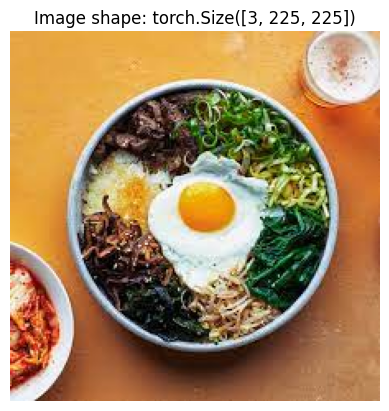

In [43]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [44]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 225, 225])
New shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


## get the model

In [46]:
from torchvision import models
from pathlib import Path
MODEL_NAME = "models/Resnet18_Model.pth"
loaded_model = models.resnet18(pretrained=True)
loaded_model.fc = torch.nn.Linear(loaded_model.fc.in_features, 3)
loaded_model.load_state_dict(torch.load(MODEL_NAME, map_location=torch.device('cpu')))

loaded_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [47]:
loaded_model.eval()
with torch.inference_mode():
    custom_image_pred = loaded_model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [48]:
custom_image_pred

tensor([[ 5.9324, -5.8746, -2.4764]], device='cuda:0')

In [49]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 5.9324, -5.8746, -2.4764]], device='cuda:0')
Prediction probabilities: tensor([[9.9977e-01, 7.4505e-06, 2.2285e-04]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [50]:
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'bibimbap'

# Test 2

In [51]:
custom_image_path = "cheesecake.jpg"
import torchvision

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

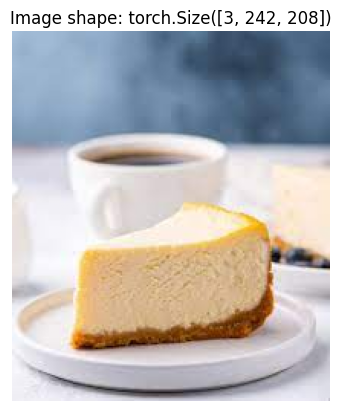

In [52]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [53]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 242, 208])
New shape: torch.Size([3, 64, 64])


In [54]:
loaded_model.eval()
with torch.inference_mode():
    custom_image_pred = loaded_model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [55]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-15.5291,  15.5283,  -4.3237]], device='cuda:0')
Prediction probabilities: tensor([[3.2504e-14, 1.0000e+00, 2.3900e-09]], device='cuda:0')
Prediction label: tensor([1], device='cuda:0')


In [56]:
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'cheesecake'

# test 3


In [57]:
custom_image_path = "donuts.jpg"
import torchvision

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

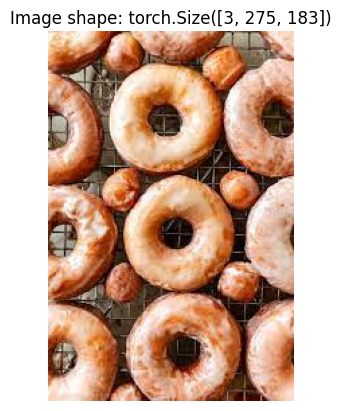

In [58]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [59]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 275, 183])
New shape: torch.Size([3, 64, 64])


In [61]:
loaded_model.eval()
with torch.inference_mode():
    custom_image_pred = loaded_model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [62]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-4.4508, -6.4384,  6.6320]], device='cuda:0')
Prediction probabilities: tensor([[1.5375e-05, 2.1068e-06, 9.9998e-01]], device='cuda:0')
Prediction label: tensor([2], device='cuda:0')


In [63]:
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'donuts'